## Implementing simple chatbot Using Langgraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["Groq_API_KEY"]=os.getenv("Groq_API_Key")

In [4]:
from langchain_groq import ChatGroq

groq_llm=ChatGroq(model="qwen/qwen3-32b")

groq_llm.invoke("Hey hi this is anil")

AIMessage(content='<think>\nOkay, the user introduced himself as Anil. I should respond warmly and ask how I can assist him. Keep it friendly and open-ended. Let me make sure the response is welcoming and encourages him to ask for help.\n</think>\n\nHey Anil! Hi there! 👋 How can I assist you today? Let me know if you have any questions or need help with something specific! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 14, 'total_tokens': 97, 'completion_time': 0.165986414, 'prompt_time': 0.000373144, 'queue_time': 0.213178822, 'total_time': 0.166359558}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c923a13c-bcbb-4f86-b2be-6f1a73e7e104-0', usage_metadata={'input_tokens': 14, 'output_tokens': 83, 'total_tokens': 97})

### We will start creating Nodes

In [5]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

def superbot(state:State):
    return {"messages":[groq_llm.invoke(state['messages'])]}

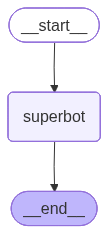

In [6]:
graph=StateGraph(State)

## adding Nodes
graph.add_node("superbot",superbot)

## adding edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot", END)


graph_builder=graph.compile(checkpointer=memory)

## Display

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [7]:
 config={"configurable":{"thread_id":"1"}}

In [8]:
graph_builder.invoke({'messages':"hey hi this is anil"},config=config)

{'messages': [HumanMessage(content='hey hi this is anil', additional_kwargs={}, response_metadata={}, id='655d4651-efd1-46c4-b95c-bd1f5ac0b17d'),
  AIMessage(content='<think>\nOkay, the user said "hey hi this is anil". Let me see how to respond.\n\nFirst, I should acknowledge their greeting. Maybe say hi back and ask how I can help. Since they mentioned their name, I can use it to make it personal.\n\nWait, but in the instructions, there\'s a note about avoiding personal information. Should I mention their name directly? Hmm, the example response uses the name, so maybe it\'s okay here.\n\nAlso, the user might be looking for assistance with something specific. I should keep the response friendly and open-ended to encourage them to explain what they need help with. Let me check the example again to make sure I follow the tone.\n\nAlright, the response should be welcoming, use their name, and invite them to ask for help. That makes sense. Let me put that together.\n</think>\n\nHello Anil

In [9]:
graph_builder.invoke({'messages':"I want to learn programming languages"},config=config)

{'messages': [HumanMessage(content='hey hi this is anil', additional_kwargs={}, response_metadata={}, id='655d4651-efd1-46c4-b95c-bd1f5ac0b17d'),
  AIMessage(content='<think>\nOkay, the user said "hey hi this is anil". Let me see how to respond.\n\nFirst, I should acknowledge their greeting. Maybe say hi back and ask how I can help. Since they mentioned their name, I can use it to make it personal.\n\nWait, but in the instructions, there\'s a note about avoiding personal information. Should I mention their name directly? Hmm, the example response uses the name, so maybe it\'s okay here.\n\nAlso, the user might be looking for assistance with something specific. I should keep the response friendly and open-ended to encourage them to explain what they need help with. Let me check the example again to make sure I follow the tone.\n\nAlright, the response should be welcoming, use their name, and invite them to ask for help. That makes sense. Let me put that together.\n</think>\n\nHello Anil

## Streaming the responses with Stream Method

In [11]:
#create a thread
config1={"configurable":{"thread_id":"2"}}

for chunk in graph_builder.stream({'messages':"Hi my name is ANil"},config1,stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content='<think>\nOkay, the user sent "Hi my name is ANil" and wants me to act as an AI assistant. First, I need to acknowledge their introduction. Let me respond with a friendly greeting and ask how I can assist them today. I should keep it simple and open-ended to encourage them to ask questions or share what they need help with. Also, make sure the tone is welcoming and approachable.\n</think>\n\nHi ANil! Nice to meet you! 😊 How can I assist you today? Feel free to ask me any questions or let me know if there\'s something specific you\'d like help with!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 14, 'total_tokens': 141, 'completion_time': 0.283414664, 'prompt_time': 0.000546482, 'queue_time': 0.221427686, 'total_time': 0.283961146}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9557a

In [12]:
for chunk in graph_builder.stream({'messages':"I like foot ball"},config1,stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content='<think>\nOkay, the user mentioned they like football. Let me start by acknowledging their interest. I should ask them what specific aspect of football they enjoy. Are they a player, a fan, or maybe interested in learning more about the game?\n\nI need to keep the tone friendly and encouraging. Maybe offer help with tips, strategies, or just general information. Also, check if they have any particular questions or need resources. Let me make sure to invite them to share more so I can provide tailored assistance.\n</think>\n\nAh, football (soccer) is an amazing sport! 🎉 I’d love to hear more—are you a fan of watching it, playing it, or both? Here are a few ways I can help:  \n- **Tips for playing** (e.g., dribbling, passing, shooting).  \n- **Strategies for a team**.  \n- **Updates on leagues or tournaments** (like the World Cup or Premier League).  \n- **Fun facts or history** of the sport.  \n\nWhat’s your favorite part about football? Let 

In [13]:
for chunk in graph_builder.stream({'messages':"But I like cricket more"},config1,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is ANil', additional_kwargs={}, response_metadata={}, id='1be40832-29d4-4310-9af4-6ad7d4a0965f'), AIMessage(content='<think>\nOkay, the user sent "Hi my name is ANil" and wants me to act as an AI assistant. First, I need to acknowledge their introduction. Let me respond with a friendly greeting and ask how I can assist them today. I should keep it simple and open-ended to encourage them to ask questions or share what they need help with. Also, make sure the tone is welcoming and approachable.\n</think>\n\nHi ANil! Nice to meet you! 😊 How can I assist you today? Feel free to ask me any questions or let me know if there\'s something specific you\'d like help with!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 14, 'total_tokens': 141, 'completion_time': 0.283414664, 'prompt_time': 0.000546482, 'queue_time': 0.221427686, 'total_time': 0.283961146}, 'model_name': 'qwen/qwen3-32b', 'system_

In [14]:
config3={"configurable":{"thread_id":"3"}}
async for event in graph_builder.astream_events({"messages":["Hi i am anil I like cricket"]},config3,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi i am anil I like cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'ddf06715-22bd-4c40-bffb-04382a7ab2a2', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi i am anil I like cricket', additional_kwargs={}, response_metadata={}, id='c1522301-f22d-4774-9a6b-e8b8f7d70121')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': '49e937c0-d9f1-40b5-8848-2a9f4a381a99', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:815e5bd5-34d9-4c85-40f1-cdfd4e4e703b'}, 'parent_ids': ['ddf06715-22bd-4c40-bffb-04382a7ab2a2']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi i am anil I like cricket', additional_kwargs={}, response_metadata={}, i